<a href="https://colab.research.google.com/github/sehar4679/HeartDiseasePredictorLR/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from google.colab import files
uploaded = files.upload()
import seaborn as sns

Saving heart_disease_data (1).csv to heart_disease_data (1).csv


In [7]:
from sklearn.metrics import accuracy_score

In [8]:
uploaded 

{'heart_disease_data (1).csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\n42,1,0,140,226,0,1,178,0,0,2,0,2,1\n61,1,2,150,243,1,1,1

In [9]:
data = pd.read_csv("heart_disease_data (1).csv")

In [10]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1 - unhealthy heart
0 - healthy heart

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
data.shape

(303, 14)

In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

0 >>>>>> healthy heart
1 >>>>>>  un
healthy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


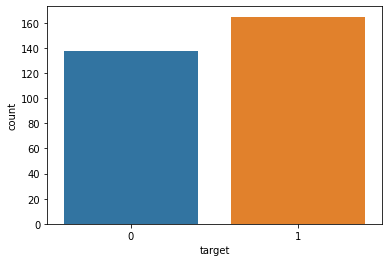

In [18]:
sns.countplot(data['target'])

In [19]:
x = data.drop(columns='target', axis=1)
y = data['target']

In [20]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 10, stratify=y)

In [23]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(242, 13) (61, 13)
(242,) (61,)


In [24]:
#training of the model usin logistic regression
model = LogisticRegression()

In [25]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [26]:
#accuracy on training data
x_test_prediction = model.predict(x_test)
training_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [27]:
print("Accuracy of the model on training data", training_data_accuracy)

Accuracy of the model on training data 0.8852459016393442


BUILDING A PREDICTIVE SYSTEM

In [28]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,	0,1)
input_array = np.asarray(input_data)

#reshape

input_array_reshape = input_array.reshape(1,-1)

prediction = model.predict(input_array_reshape)
print(prediction)

if(prediction[0]==0):
  print("the person does not have a heart disease")

else:
  print("the person does have a heart disease")



[1]
the person does have a heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
